In [9]:
import pandas as pd
import requests

In [10]:
url = "http://127.0.0.1:8090/api/collections/listing/records"

req = requests.get(url)

data = req.json()
pages = data["totalPages"]
items = data["items"]

for i in range(1,pages):
    req = requests.get(url+"?page={}".format(i))
    data = req.json()
    items = items + data["items"]

In [11]:
df = pd.DataFrame(items)
df["price"] = df["price"].apply(lambda p: int(p.replace('$', '').replace(',', '')))
df = df[["title", "price"]]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4620 non-null   object
 1   price   4620 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 72.3+ KB


In [13]:
df = df[df["price"] != 0]
df = df.sort_values("price", ascending=False)

In [17]:
make = "Toyota"
tdf = df[df["title"].str.contains(make, case=False)]

In [18]:
tdf

,title,price
3507,2023 Toyota Tundra 4WD SR5 Great Internet Deal...,52988
3506,2023 Toyota Tundra 4WD SR5 Great Internet Deal...,52988
3498,2023 Toyota Tundra 4WD SR5 Great Internet Deal...,52988
3486,2023 Toyota Tundra 4WD SR5 Great Internet Deal...,52988
3478,2023 Toyota Tundra 4WD SR5 Great Internet Deal...,52988
...,...,...
685,2005 Toyota Pruis (Mechanic's Special),1500
686,2005 Toyota Pruis (Mechanic's Special),1500
687,2005 Toyota Pruis (Mechanic's Special),1500
689,2005 Toyota Pruis (Mechanic's Special),1500


<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 3507 to 690
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   298 non-null    object
 1   price   298 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


<Axes: ylabel='Frequency'>

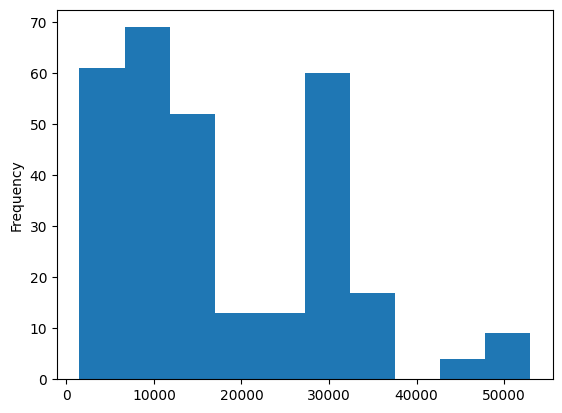

In [19]:
tdf = tdf[tdf["price"] <= 100000]
tdf.info()
tdf["price"].plot(kind="hist",bins=10)

In [28]:
smpl = df.sample(100)
for s in smpl["title"]:
    sdf = df[df["title"].str.contains(s, case=False)]
    print(sdf.count)

<bound method DataFrame.count of                                                title  price
3824  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3823  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3832  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3831  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3826  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3825  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3828  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3827  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500
3820  2014 Mercedes-Benz GL-Class - BAY LUXURY AUTOS  18500>
<bound method DataFrame.count of                                title  price
95    2018 Toyota Tundra CrewMax SR5  27999
98    2018 Toyota Tundra CrewMax SR5  27999
96    2018 Toyota Tundra CrewMax SR5  27999
101   2018 Toyota Tundra CrewMax SR5  27999
100   2018 Toyota Tundra CrewMax SR5  27999
1095  2018 Toyota Tundra CrewMax SR5  27999
1141  2018 Toyota Tundra 

/tmp/ipykernel_1560417/2443604137.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sdf = df[df["title"].str.contains(s, case=False)]
/tmp/ipykernel_1560417/2443604137.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sdf = df[df["title"].str.contains(s, case=False)]


<bound method DataFrame.count of                                                   title  price
3289  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3382  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3384  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3366  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3378  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3375  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3376  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3391  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997
3374  1999 FORD F-250 V10 4X4 58K 1-OWNER F250 F350 ...  24997>
<bound method DataFrame.count of                    title  price
3962  2008 Ford Focus Se   2995
3963  2008 Ford Focus Se   2995
3960  2008 Ford Focus Se   2995
3961  2008 Ford Focus Se   2995
3966  2008 Ford Focus Se   2995
3965  2008 Ford Focus Se   2995
3958  2008 Ford Focus Se   2995
3973  2008 Ford Focus Se   2995
3959  2008 Ford